<a href="https://colab.research.google.com/github/rafflds/Deep_Learning_com_Keras/blob/main/Deep_Learning_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizando e importando

In [ ]:
from tensorflow import keras
import tensorflow

dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [ ]:
imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

**Tamanho da variável**

In [ ]:
len(imagens_treino)

60000

In [ ]:
len(imagens_teste)

10000

**Array de 28 linhas com 28 colunas**

In [ ]:
imagens_treino.shape

(60000, 28, 28)

## Plotar imagens

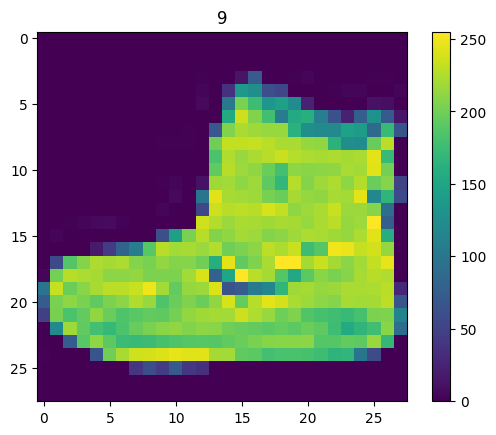

In [ ]:
import matplotlib.pyplot as plt

# Plotar 1° imagem do dataset
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.colorbar()

## Quantidade de nomes das imagens

In [ ]:
print('Mínimo: ', identificacoes_treino.min())
print('Máximo: ', identificacoes_treino.max())

Mínimo:  0
Máximo:  9


## Plotar em gráfico
> as 10 imagens

> mudar o nome de suas identificações

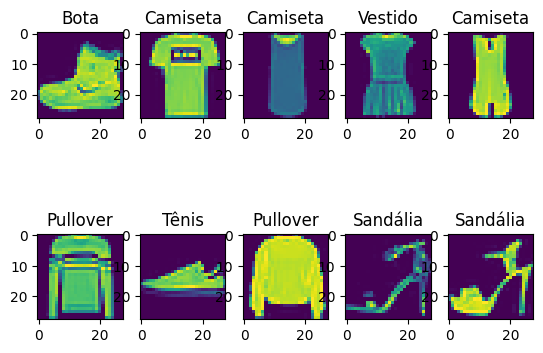

In [ ]:
total_classificacoes = 10
nomes_classificacoes = ['Camiseta','Calça','Pullover','Vestido','Casaco',
                        'Sandália','Camisa','Tênis','Bolsa','Bota']
for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_classificacoes[identificacoes_treino[imagem]])

## Criando camadas

In [ ]:
# Normalização: Cores da imagem (255) mais ou menos, fica na barra lateral
imagens_treino = imagens_treino/255.0

modelo = keras.Sequential([
    # Entrada
    keras.layers.Flatten(input_shape=(28,28)), # tamanho da imagem 28x28
    keras.layers.Dense(256, activation=tensorflow.nn.relu), 
    # Processamento
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # total de classificações
    # saída
])

# Epochs = Quantidade de 'X' que o modelo será treinado
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5038 - accuracy: 0.8226 - val_loss: 0.4150 - val_accuracy: 0.8441
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3774 - accuracy: 0.8635 - val_loss: 0.3794 - val_accuracy: 0.8677
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3355 - accuracy: 0.8764 - val_loss: 0.3489 - val_accuracy: 0.8738
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3081 - accuracy: 0.8861 - val_loss: 0.3616 - val_accuracy: 0.8673
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2918 - accuracy: 0.8907 - val_loss: 0.3497 - val_accuracy: 0.8771


## Acessando as validações

In [ ]:
historico.history

{'loss': [0.503786027431488,
  0.3773881793022156,
  0.3355328142642975,
  0.3080923557281494,
  0.2917619049549103],
 'accuracy': [0.8226458430290222,
  0.8635416626930237,
  0.8763541579246521,
  0.8861250281333923,
  0.890708327293396],
 'val_loss': [0.4150330126285553,
  0.3794107139110565,
  0.348900705575943,
  0.36163485050201416,
  0.34967339038848877],
 'val_accuracy': [0.844083309173584,
  0.8677499890327454,
  0.8738333582878113,
  0.8672500252723694,
  0.8770833611488342]}

## Plotar um gráfico com as validações

> **Overfitting**: O ajuste excessivo é um comportamento indesejável de aprendizado de máquina que ocorre quando o modelo de aprendizado de máquina fornece previsões precisas para dados de treinamento, mas não para novos dados.



> **Acurácia x Validação**

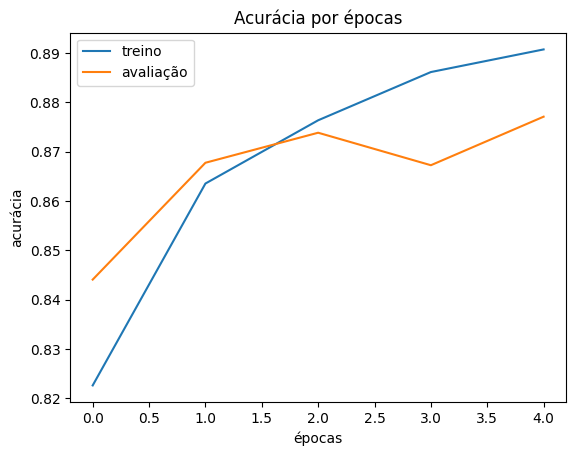

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','avaliação'])

> **Perda x Validação**

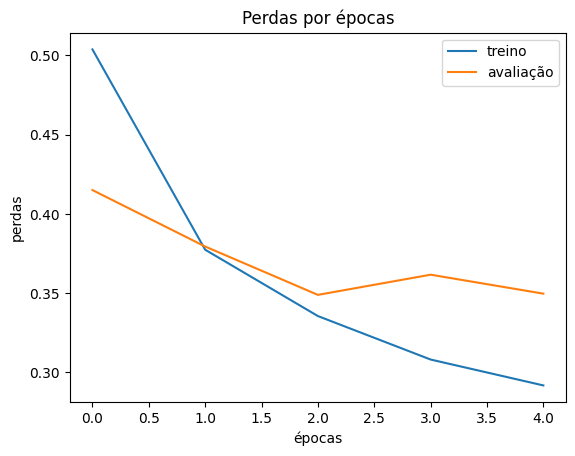

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perdas')
plt.legend(['treino','avaliação'])

## Predição argumento

In [ ]:
import numpy as np

# Testar se o modelo acerto o numero do argumento
testes = modelo.predict(imagens_teste)
print(f'Resultado teste: {np.argmax(testes[7])}')
print(f'Número de imagem de teste: {identificacoes_teste[7]}')

313/313 [==============================] - 1s 3ms/step
Resultado teste: 6
Número de imagem de teste: 6


In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda teste:{perda_teste} == Acurácia teste: {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 76.6907 - accuracy: 0.8349
Perda teste:76.6906967163086 == Acurácia teste: 0.8349000215530396


## Criando camadas

In [ ]:
# Normalização: Cores da imagem (255) mais ou menos, fica na barra lateral
imagens_treino = imagens_treino/255.0

modelo = keras.Sequential([
    # Entrada
    keras.layers.Flatten(input_shape=(28,28)), # tamanho da imagem 28x28
    keras.layers.Dense(256, activation=tensorflow.nn.relu), 
    # Processamento
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # total de classificações
    # saída
])

# Epochs = Quantidade de 'X' que o modelo será treinado
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 1.1033 - accuracy: 0.6519 - val_loss: 0.7043 - val_accuracy: 0.7573
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6619 - accuracy: 0.7612 - val_loss: 0.5932 - val_accuracy: 0.7832
Epoch 3/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.5853 - accuracy: 0.7896 - val_loss: 0.5393 - val_accuracy: 0.8042
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5399 - accuracy: 0.8058 - val_loss: 0.5095 - val_accuracy: 0.8186
Epoch 5/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5101 - accuracy: 0.8184 - val_loss: 0.4849 - val_accuracy: 0.8268


## Salva modelo

In [ ]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

**Testar o modelo salvo**

In [ ]:
testes = modelo_salvo.predict(imagens_teste)
np.argmax(testes[1])

313/313 [==============================] - 2s 5ms/step


2

## Plotar um gráfico com as validações

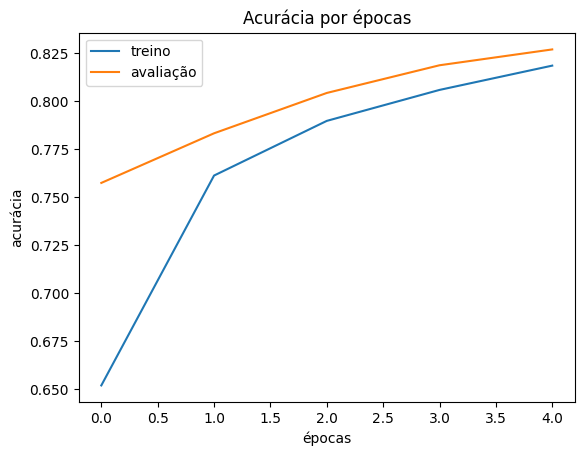

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','avaliação'])

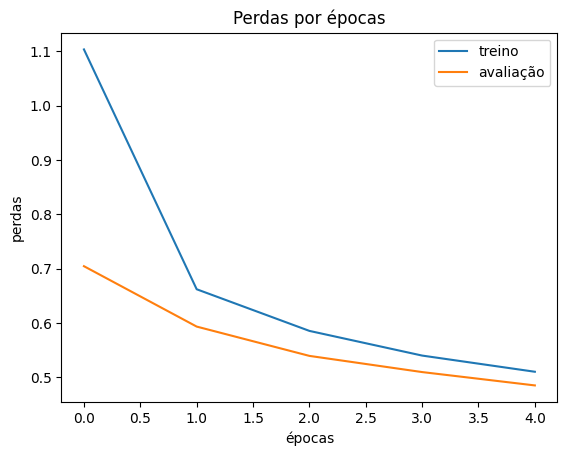

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perdas')
plt.legend(['treino','avaliação'])